# Demos in 2D and 3D

Demos showing the use of the algorithm from `localthickness` module for fast computation of local thickness in 2D and in 3D. Demos work on synthetically generated data.

Two variants are shown: the use of localthickness without scaling and with (down)scaling. Scaling will speed up the computation. Here we use `scale=0.5`, but for very large images or volumes, you may consider a stronger scaling, e.g. `scaling=0.25`. Both variants are called from the same function `local_thickness`.



In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time
import localthickness as lt


## 2D local thickness, not scaled and scaled

In [2]:
# Create test image
B = lt.create_test_volume((1200, 800), sigma=15, boundary=0.02, seed=2)


In [3]:
# Local thickness algorithm, without scalling.
start_time = time.time()
thickness = lt.local_thickness(B)
time_thickness = time.time() - start_time


In [4]:
# Scaled algorithm that speeds up computation.
scale = 0.5
start_time = time.time()
thickness_scaled = lt.local_thickness_scaled(B, scale=scale)
time_scaled = time.time() - start_time


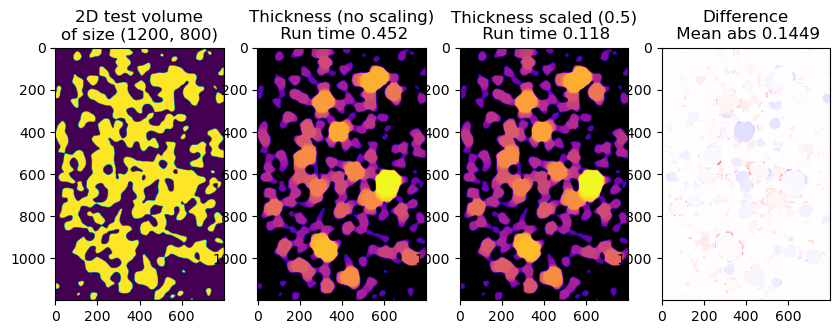

In [5]:
# Prepare for visualization.
maxval = max(np.abs(thickness).max(), np.abs(thickness_scaled).max())
diff = thickness_scaled - thickness
maxd = np.abs(diff).max()


# Visualize.
fig, ax = plt.subplots(1, 4, figsize=(10, 5))
ax[0].imshow(B)
ax[0].set_title(f'2D test volume\nof size {B.shape}')
ax[1].imshow(thickness, vmin=0, vmax=maxval, cmap=lt.black_plasma())
ax[1].set_title(f'Thickness (no scaling)\n Run time {time_thickness:0.3}')
ax[2].imshow(thickness_scaled, vmin=0, vmax=maxval, cmap=lt.black_plasma())
ax[2].set_title(f'Thickness scaled ({scale})\n Run time {time_scaled:0.3}')
ax[3].imshow(diff, vmin=-maxd/2, vmax=maxd/2, cmap=plt.cm.seismic)
ax[3].set_title(f'Difference\n Mean abs {np.abs(diff).mean():0.4}')
plt.show()


###### Conclusion
Using scaling speeds up the computation, with only slight change in the final result.

## 3D local thickness, not scaled and scaled

In [6]:
# Create test volume.
B = lt.create_test_volume((120, 250, 200), sigma=5, boundary=0.05, seed=0)


In [7]:
# Local thickness algorithm (may be slow for large 3D images).
start_time = time.time()
thickness = lt.local_thickness(B)
time_thickness = time.time() - start_time


In [8]:
# Scaled algorithm that speeds up computation.
scale = 0.5
start_time = time.time()
thickness_scaled = lt.local_thickness_scaled(B, scale=scale)
time_scaled = time.time() - start_time


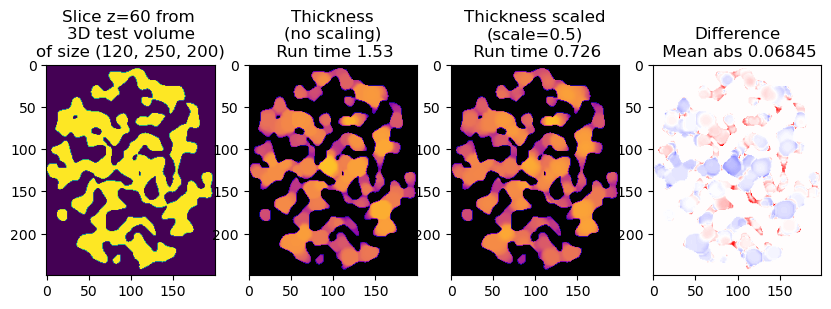

In [9]:
# Prepare for visualization.
maxval = max(np.abs(thickness).max(), np.abs(thickness_scaled).max())
diff = thickness_scaled - thickness
maxd = np.abs(diff).max()

# Visualze.
z = 60
fig, ax = plt.subplots(1, 4, figsize=(10, 5))
ax[0].imshow(B[z])
ax[0].set_title(f'Slice z={z} from \n3D test volume\nof size {B.shape}')
ax[1].imshow(thickness[z], vmin=0, vmax=maxval, cmap=lt.black_plasma())
ax[1].set_title(f'Thickness\n(no scaling)\n Run time {time_thickness:0.3}')
ax[2].imshow(thickness_scaled[z], vmin=0, vmax=maxval, cmap=lt.black_plasma())
ax[2].set_title(f'Thickness scaled\n(scale={scale})\n Run time {time_scaled:0.3}')
ax[3].imshow(diff[z], vmin=-maxd, vmax=maxd, cmap=plt.cm.seismic)
ax[3].set_title(f'Difference\n Mean abs {np.abs(diff).mean():0.4}')
plt.show()


###### Conclusion
Also in 3D, using scaling speeds up the computation, with only slight change in the final result.